In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("H:/sanjeev/swiggy NEW2.csv")
df.head()

,ID,Area,City,Restaurant,Unnamed: 4,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,NaN,"3,00",4.4/5,100.0,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,NaN,"3,00",4.1,100.0,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,NaN,650,4.4/5,100.0,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,NaN,250,3.9,500.0,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,NaN,350,4,50.0,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Unnamed: 4     0 non-null      float64
 5   Price          8665 non-null   object 
 6   Avg ratings    8680 non-null   object 
 7   Total ratings  8666 non-null   float64
 8   Food type      8680 non-null   object 
 9   Address        8680 non-null   object 
 10  Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 746.1+ KB


In [4]:
# dropping unnecessary column
df.drop(["Unnamed: 4"],axis=1,inplace=True)

In [5]:
df.isnull().sum()

ID                0
Area              0
City              0
Restaurant        0
Price            15
Avg ratings       0
Total ratings    14
Food type         0
Address           0
Delivery time     0
dtype: int64

In [6]:
# filling null values
df["Total ratings"].fillna(value=df["Total ratings"].mean(),inplace=True)

# we cannot to fill the duplicates in price because there are some strings values so we have to change them into int

In [7]:
df["Price"].unique()

array(['3,00', '650', '250', '350', '800', '1000', '150', '400', '532',
       '500', '290', '1200', '600', '850', '900', '200', '750', '1100',
       '450', '550', '700', nan, '1500', '1600', '326', '1400', '100',
       '1300', '249', '1700', '299', '599', '220', '120', '193', '499',
       '1900', '178', '950', '330', '1', '50', '160', '1800', '2000', '0',
       '256', '197', '140', '180', '1250', '20', '260', '99', '30', '240',
       '80', '1255', '155', '199', '270', '280', '40', '175', '399',
       '2500', '149', '230', '70', '48', '190', '275', '380', '289',
       '325', '159', '49', '360', '420', '170', '129', '390', '2', '205',
       '493', '196', '355', '398', '110', '620', '10', '105', '320',
       '480', '540', '590', '338', '978', '137', '375', '126', '384',
       '251', '151', '1650', '85', '15', '65', '130', '60', '640', '225',
       '198', '98', '45', '518', '502', '340', '297', '75', '5'],
      dtype=object)

In [8]:
#removing comma into the price
def handlecomma (value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)
df["Price"]=df["Price"].apply(handlecomma)
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4/5,100.0,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100.0,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4/5,100.0,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500.0,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4,50.0,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [9]:
#filling null values of the price by mean of price
df["Price"].fillna(value=df["Price"].mean(),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   object 
 6   Total ratings  8680 non-null   float64
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 678.2+ KB


In [10]:
df["Avg ratings"].unique()

array(['4.4/5', '4.1', '3.9', '4', '4.5', '4.3', '4.2', '2.9', '3.8',
       '4.6', '3.7', '3.2', '2.2', '3.6', '4.7', '3.5', '3', '3.3', '3.4',
       '2.8', '4.8', '4.9', '2.6', '2.7', '3.1', '2.5', '2.3', '5', '2',
       '2.4'], dtype=object)

In [11]:
#handling avg ratings
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)
df["Avg ratings"]=df["Avg ratings"].apply(handlerate)
df["Avg ratings"].head()

0    4.4
1    4.1
2    4.4
3    3.9
4    4.0
Name: Avg ratings, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   float64
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 678.2+ KB


In [13]:
#handing outliers
ad=df["Address"].value_counts(ascending=True)
num_address_below50=ad[ad<50]
num_address_below50

Sanjay Nagar New Bel Road               1
Near Lal Gate Ramlal Bazarsapuipara     1
Nr Udhna Bus Depot                      1
Golf Gardens  Tollygunge                1
Cambridge Layout                        1
                                       ..
Alwarpet                               42
Andheri East                           42
Dumdum                                 43
Matunga Wadala                         43
Jadavpur                               46
Name: Address, Length: 2300, dtype: int64

In [16]:
def handle_address (value):
    if value in num_address_below50:
        return "others"
    else:
        return value
df["Address"]=df["Address"].apply(handle_address)
df["Address"].value_counts()

others                     5220
Rohini                      229
Chembur                     166
Kothrud                     158
Kurla                       138
Navrangpura                 136
Scruz Bandra East           126
Salt Lake                   120
Marol Sakinaka              116
Central Bangalore           116
Himayath Nagar              113
South Kolkata               111
Vastrapur                   105
Indiranagar                 103
Central Kolkata             103
Kothapet & Dilsukhnagar     101
Annanagar                    99
Shivaji Nagar                94
Koramangala                  94
Perambur                     91
Banjara Hills                80
Powai                        71
Lake Town                    68
Nungambakkam                 64
Ghatkopar Vikhroli           58
Nallakunta & Vidyanagar      57
Piplod                       57
Athwa                        56
T Nagar                      55
Kondhwa                      55
Koregaon Park                54
Burrabaz

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   float64
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 678.2+ KB


# Data visualization

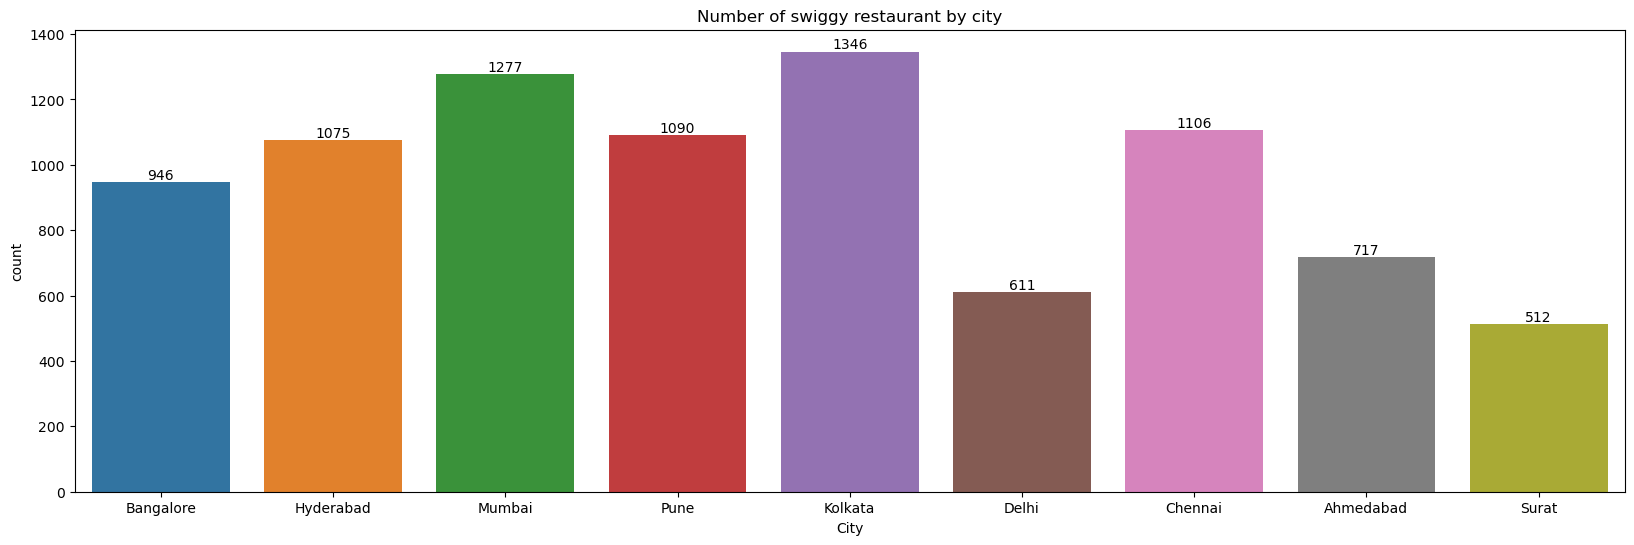

In [15]:
#chart 1
plt.figure(figsize=(20,6))
a=sns.countplot(x="City",data=df)
plt.title("Number of swiggy restaurant by city")
for bars in a.containers:
    a.bar_label(bars)



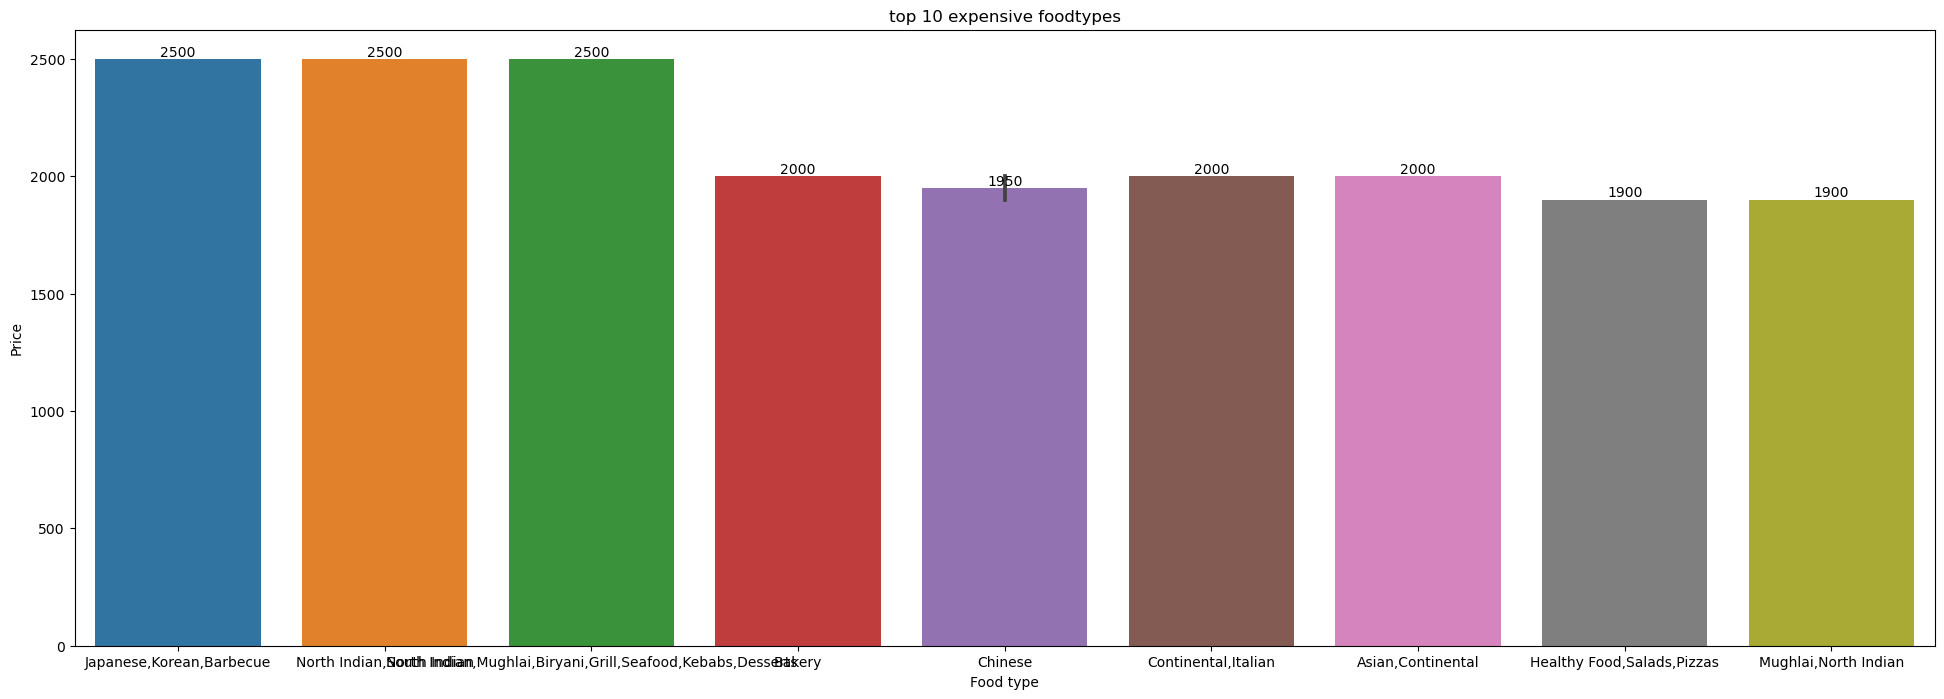

In [64]:
#chart 2
a=df[["Price","Food type"]].sort_values(by="Price",ascending=False).head(10)
plt.figure(figsize=(24,8))
plt.title("top 10 expensive foodtypes")
s=sns.barplot(x="Food type",y="Price",data=a)
for bars in s.containers:
    s.bar_label(bars)

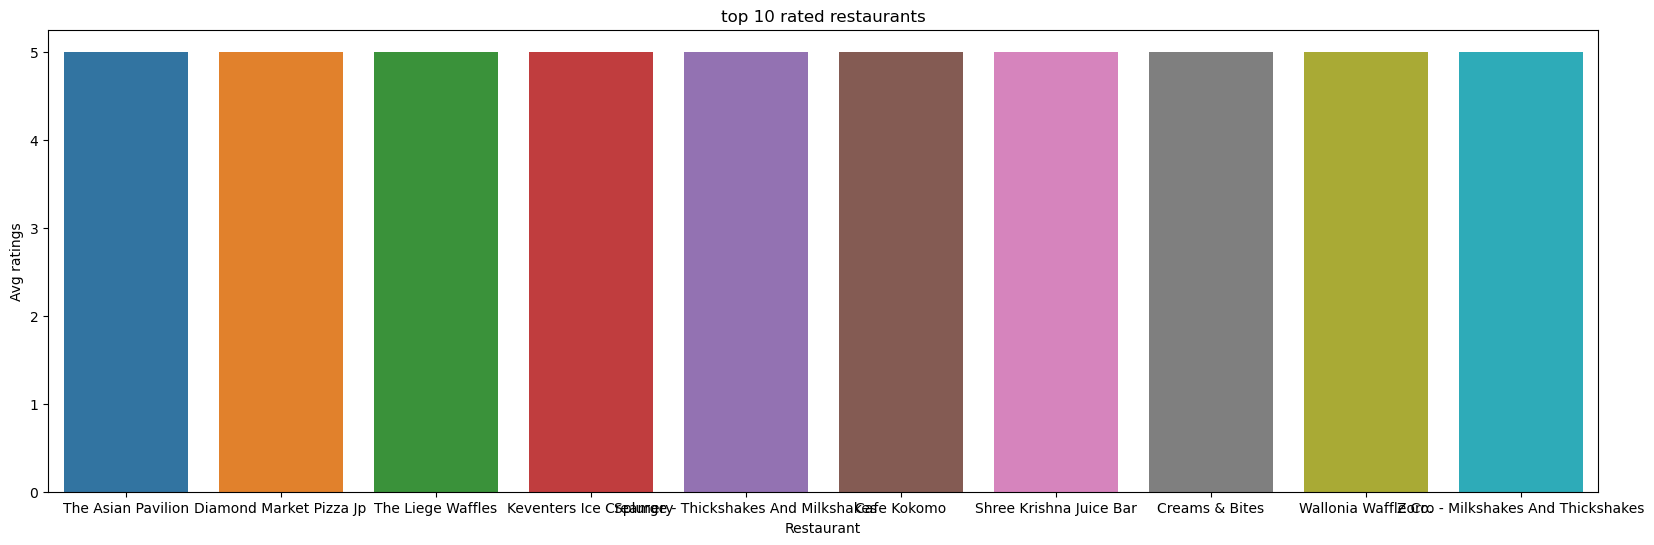

In [17]:
#chart 3
j=df[["Avg ratings","Restaurant"]].sort_values(by="Avg ratings", ascending=False).head(10)
plt.figure(figsize=(20,6))
plt.title("top 10 rated restaurants")
sns.barplot(x="Restaurant",y="Avg ratings",data=j)
plt.show()

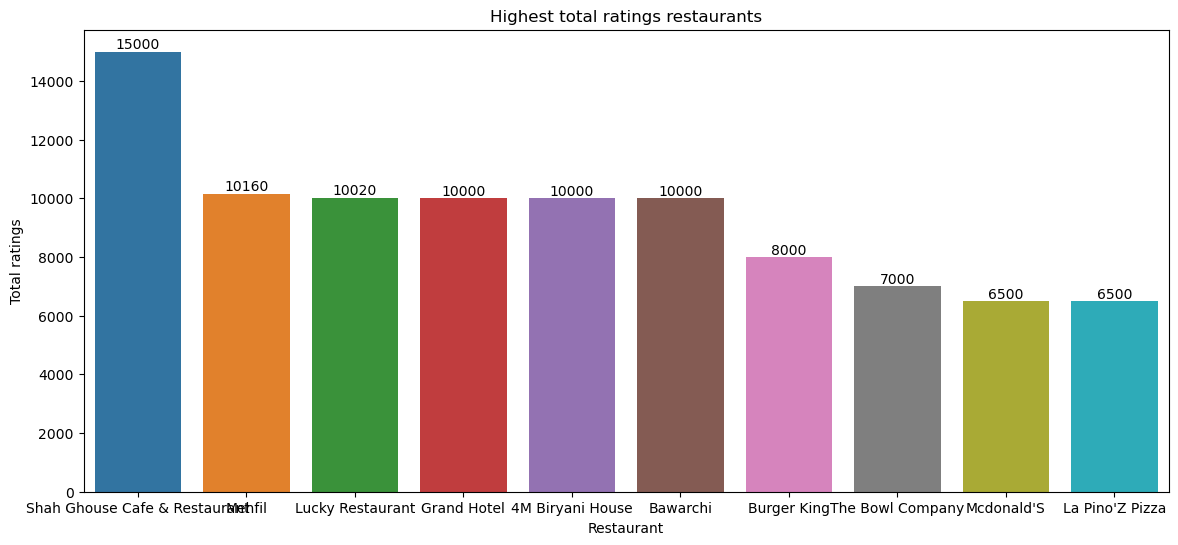

In [18]:
#chart 4
t=df.groupby(["Restaurant"], as_index=False) ["Total ratings"].sum().sort_values(by="Total ratings",ascending=False).head(10)
plt.figure(figsize=(14,6))
y=sns.barplot(x="Restaurant",y="Total ratings",data=t)
plt.title("Highest total ratings restaurants")
for bars in y.containers:
    y.bar_label(bars)

In [23]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

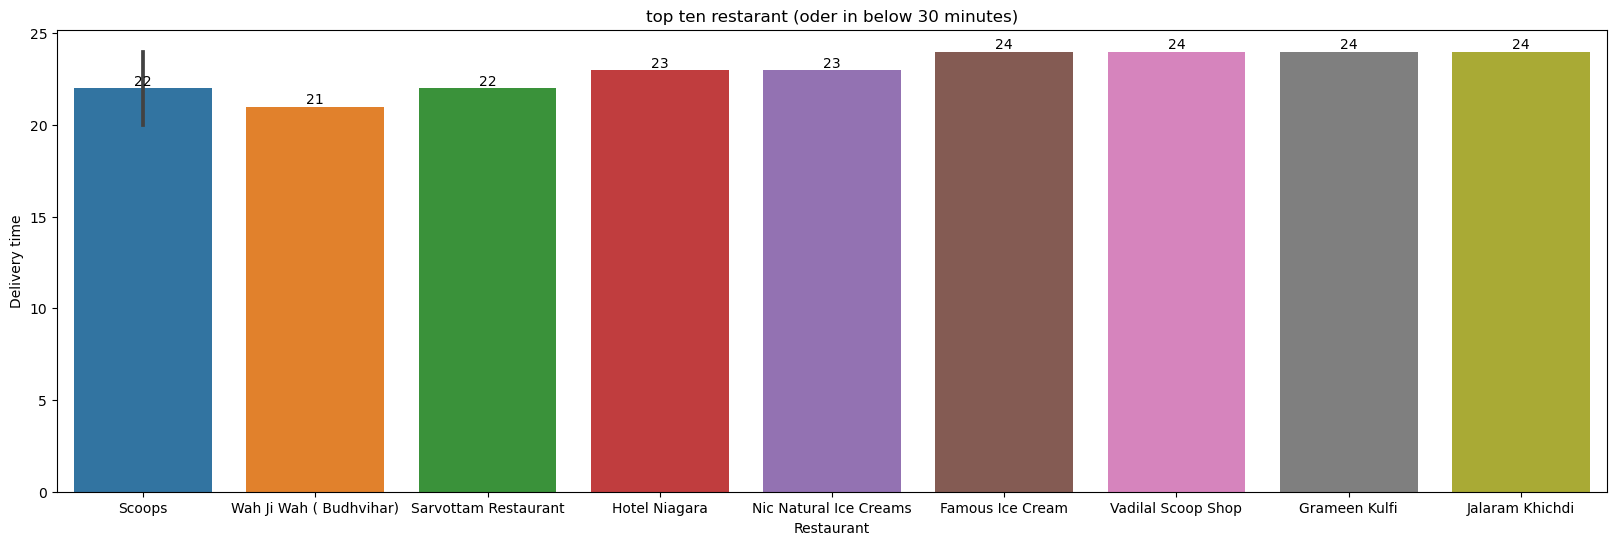

In [57]:
#chart 5
f=df[df["Delivery time"]<30]
r=f[["Restaurant","Delivery time"]].sort_values(by="Delivery time", ascending=True).head(10)
plt.figure(figsize=(20,6))
plt.title("top ten restarant (oder in below 30 minutes)")
s=sns.barplot(x="Restaurant",y="Delivery time",data=r)
for bars in s.containers:
    s.bar_label(bars)

In [ ]:
# conclusion
# As per the chart one, it can be seen that Kolkata city is having the maximum number of the restaurants while Surat city only has 512 restaurants.
# The most expensive food items are in the range of 1900-2500 in the menu list of Swiggy. Three products that are more expensive are the Japanese food, North Indian food and Mughal Biryani.
# The highest total ratings are of Shah house restaurant with the 15000 ratings. 
# In the context of delivery time, the lower delivery time is taken only by Wah ji wah restaurant that is below 21 minutes. 
